<img src='https://mundiwebservices.com/build/assets/Mundi-Logo-CMYK-colors.png'  align='left' width='15%' ></img>  

# Mundi WMS Country Polygon

In [1]:
from utils import country_polygon_bbox
from utils import display_country_on_world_map

In [2]:
from matplotlib import pyplot as plt
from shapely.geometry.polygon import Polygon
from descartes import PolygonPatch

# Selection of the desired country

In [3]:
country_name = 'Slovenia'
polygon, bbox = country_polygon_bbox(country_name)

# Polygon and  Bbox of the selected country

In [4]:
print(country_name)
print(f'bbox = {bbox}')
print(polygon)

Slovenia
bbox = (13, 45, 17, 47)
POLYGON ((13.80647545742153 46.50930613869122, 14.63247155117483 46.43181732846955, 15.13709191250499 46.65870270444703, 16.01166385261266 46.6836107448117, 16.20229821133736 46.85238597267696, 16.37050499844742 46.8413272161665, 16.56480838386486 46.50375092221983, 15.76873294440855 46.23810822202345, 15.67152957526756 45.83415355079788, 15.3239538916724 45.73178253842768, 15.32767459479743 45.45231639259333, 14.93524376797293 45.47169505470269, 14.59510949062781 45.63494090431271, 14.41196821458541 45.46616567644746, 13.71505984869722 45.50032379819238, 13.93763024257831 45.59101593686462, 13.69810997890548 46.01677806251735, 13.80647545742153 46.50930613869122))


# Display of the selected country on a static and an interactive map

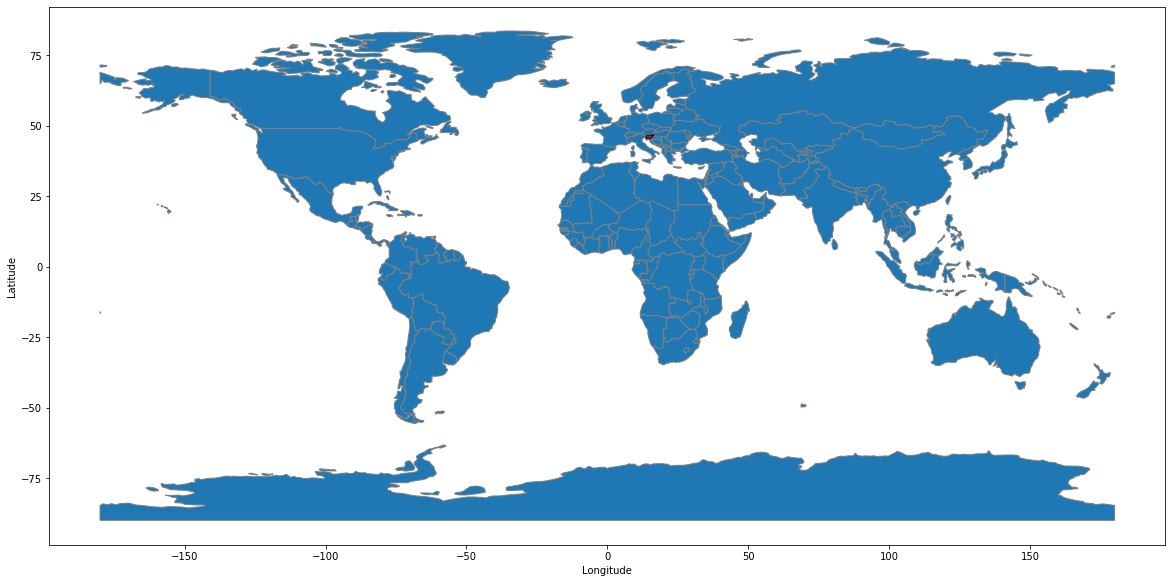

In [5]:
display_country_on_world_map(country_name, 20, 'red') 

In [6]:
import folium
m = folium.Map([50.854457, 4.377184], zoom_start=3, tiles='cartodbpositron')
folium.GeoJson(polygon).add_to(m)
folium.LatLngPopup().add_to(m)
m

# Getting a geojson file for the polygon of the selected country and display in it in the website

In [7]:
import warnings
warnings.filterwarnings("ignore")
import json
import geojsonio
import geopandas as gpd

crs = {'init': 'epsg:4326'}
polygon_file = gpd.GeoDataFrame(index=[0], crs=crs, geometry=[polygon])
polygon_file.to_file(filename='/home/jovyan/work/polygon.geojson', driver='GeoJSON')


country_polygon = gpd.read_file('/home/jovyan/work/polygon.geojson')

country_polygon = country_polygon.to_json()

url=geojsonio.display(country_polygon)

from IPython.core.display import display, HTML
display(HTML(f"""<a href={url}>{country_name}</a>"""))
